In [12]:
from PythonCode.preprocess.preprocess import *

In [13]:
from PythonCode.models import *

In [43]:
import pandas as pd
import swifter
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string
from typing import List
from nltk.corpus import stopwords
from itertools import islice
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import os
import sys
from abc import ABC, abstractmethod

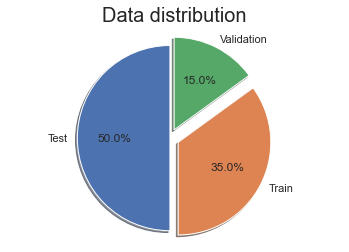

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
fig1, ax1 = plt.subplots()
ax1.pie([0.5,0.35,0.15], explode = [0,0.1, 0.1], labels=["Test", "Train", "Validation"], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Data distribution",fontsize=20)
plt.show()

In [45]:
x_train, x_validation, x_test, y_train, y_validation, y_test = preprocess_pipeline("Data/C50train", "Data/C50test", 2, bag_of_words, normalize =False,
                        save_path="./Data/clean/")

In [46]:
x_train.shape

(70, 4453)

In [47]:
x_test.shape

(100, 4453)

In [48]:
x_validation.shape 

(30, 4453)

# Simple Model 

## KNN  

C:\Users\eviat\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


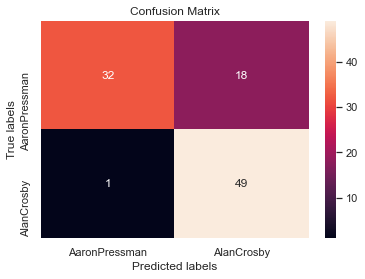

<Figure size 720x504 with 0 Axes>

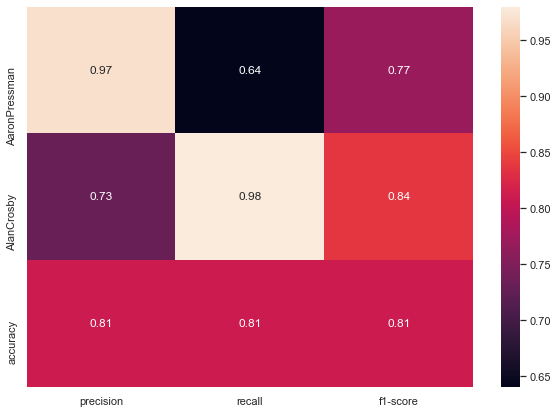

In [62]:
from sklearn.neighbors import KNeighborsClassifier
class KNN(Model):
    def train(self, x_train, y_train,**kwargs):
        self.mnb = KNeighborsClassifier(n_neighbors=10, weights= 'distance', p=2)
        self.mnb.fit(x_train, y_train)
        return self.mnb
    def predict(self,x_test):
        return self.mnb.predict(x_test)
KNN().pipeline(x_train, y_train, x_test.values, y_test,"simple KNN",do_cross_validation=False)
# KNN().pipeline(x_train, y_train, x_test.values, y_test,"simple KNN",do_cross_validation=False)

## Naive Bayes

C:\Users\eviat\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


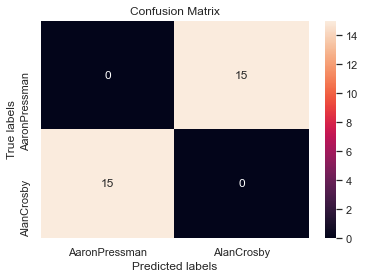

<Figure size 720x504 with 0 Axes>

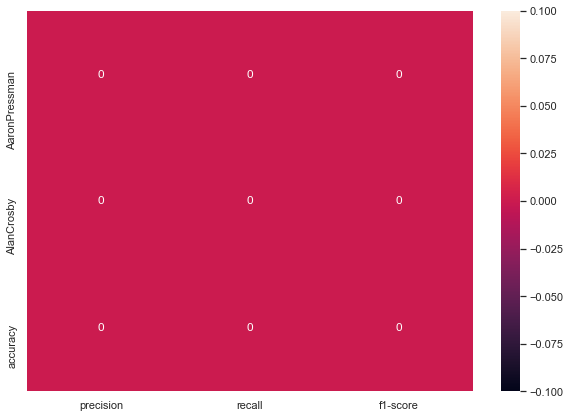

In [26]:
from sklearn.naive_bayes import MultinomialNB
class Naive_Bayes(Model):
    def train(self, x_train, y_train,**kwargs):
        self.mnb = MultinomialNB()
        self.mnb.fit(x_train, y_train)
        return self.mnb
    def predict(self,x_validation):
        return self.mnb.predict(x_validation)
Naive_Bayes().pipeline(x_train, y_train, x_validation.values, y_validation,"simple Naive Bayes 2 Authors",do_cross_validation=False)

# Feartue selection

In [63]:
from sklearn.feature_selection import VarianceThreshold
column_names = x_train.columns 
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(x_train)
x_train = sel.transform(x_train)
x_validation = x_validation.drop([feature for feature in column_names if feature not in sel.get_feature_names_out()],axis=1)

In [64]:
x_test = x_test.drop([feature for feature in column_names if feature not in sel.get_feature_names_out()],axis=1)

In [65]:
x_test.shape 

(100, 700)

In [66]:
sel.get_feature_names_out()

array(['000', '10', '100', '11', '12', '13', '14', '15', '150', '17',
       '18', '1974', '1982', '1994', '1995', '1996', '1997', '20', '202',
       '23', '25', '26', '28', '29', '30', '31', '41', '639', '68', '70',
       '85', 'able', 'about', 'access', 'according', 'act', 'action',
       'activities', 'added', 'address', 'addresses', 'administration',
       'after', 'against', 'ahead', 'all', 'alliance', 'allow', 'allowed',
       'already', 'also', 'although', 'amendment', 'america', 'amp', 'an',
       'analyst', 'analysts', 'and', 'another', 'any', 'approach',
       'april', 'are', 'argued', 'around', 'as', 'association', 'at',
       'august', 'authority', 'available', 'back', 'bank', 'banka',
       'bankers', 'banking', 'banks', 'be', 'because', 'becker', 'been',
       'before', 'bell', 'berger', 'between', 'big', 'bill', 'billion',
       'bills', 'board', 'body', 'bond', 'both', 'bourse', 'bratislava',
       'break', 'bring', 'british', 'bse', 'bucharest', 'budapest',

## Naive Bayes 

C:\Users\eviat\anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(


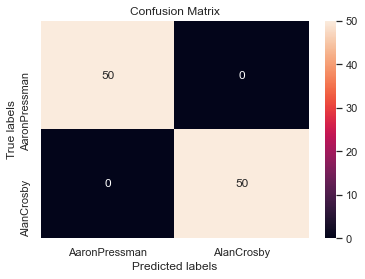

<Figure size 720x504 with 0 Axes>

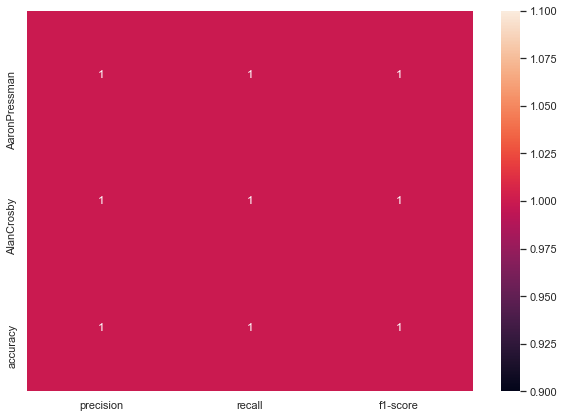

In [67]:
from sklearn.naive_bayes import MultinomialNB
class Naive_Bayes(Model):
    def train(self, x_train, y_train,**kwargs):
        self.mnb = MultinomialNB()
        self.mnb.fit(x_train, y_train)
        return self.mnb
    def predict(self,x_validation):
        return self.mnb.predict(x_validation)
# Naive_Bayes().pipeline(x_train, y_train, x_validation.values, y_validation,"simple Naive Bayes 2 Authors",do_cross_validation=False)
Naive_Bayes().pipeline(x_train, y_train, x_test, y_test,"simple Naive Bayes 2 Authors",do_cross_validation=False)

## KNN

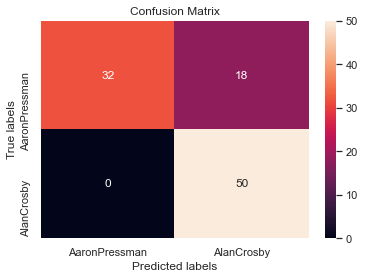

<Figure size 720x504 with 0 Axes>

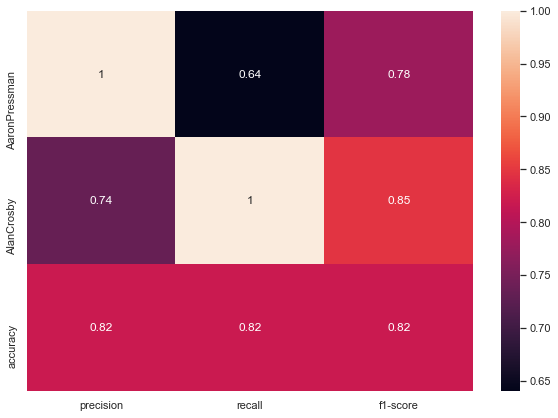

In [68]:
from sklearn.neighbors import KNeighborsClassifier
class KNN(Model):
    def train(self, x_train, y_train,**kwargs):
        self.mnb = KNeighborsClassifier(n_neighbors=4, weights= 'distance', p=2)
        self.mnb.fit(x_train, y_train)
        return self.mnb
    def predict(self,x_test):
        return self.mnb.predict(x_test)
KNN().pipeline(x_train, y_train, x_test.values, y_test,"simple KNN",do_cross_validation=False)

In [ ]:
from sklearn.linear_model import SGDClassifier
class LogisticRegression(Model):
    def train(self, x_train, y_train,**kwargs):
        self.mnb = SGDClassifier(loss='log')
        self.mnb.fit(x_train, y_train)
        return self.mnb
    def predict(self,x_test):
        return self.mnb.predict(x_test)
KNN().pipeline(x_train.values, y_train.values, x_test.values, y_test.values,"LogisticRegression 2 Authors 1.1",do_cross_validation=False)

In [11]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(x_train)
x_train_ = sel.transform(x_train)
x_validation = x_validation.drop([feature for feature in np.array(x_train.columns) if feature not in sel.get_feature_names_out()],axis=1)

In [12]:
x_train = x_train_

In [13]:
x_train.shape, x_test.shape

((70, 678), (100, 4352))

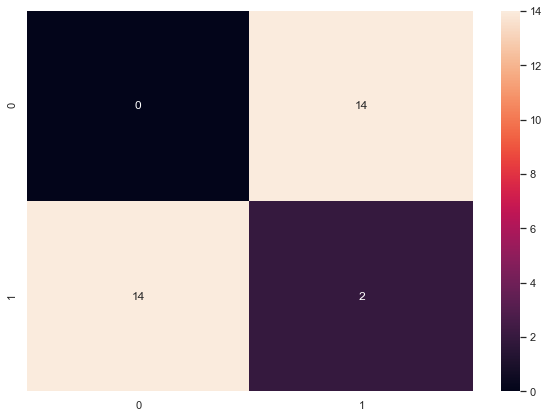

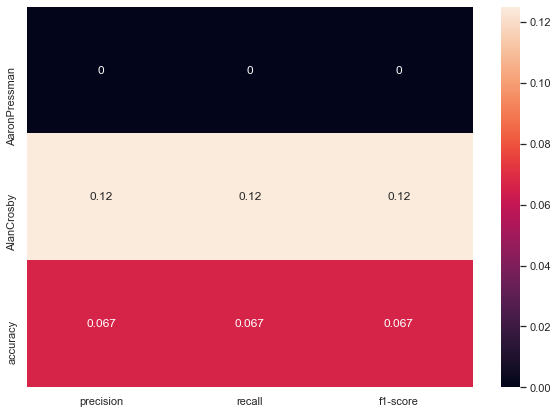

In [14]:
from sklearn.neighbors import KNeighborsClassifier
class KNN(Model):
    def train(self, x_train, y_train,**kwargs):
        self.mnb = KNeighborsClassifier(n_neighbors=10, weights= 'distance', p=2)
        self.mnb.fit(x_train, y_train)
        return self.mnb
    def predict(self,x_validation):
        return self.mnb.predict(x_validation)
KNN().pipeline(x_train, y_train, x_validation.values, y_validation,"nevdsvdsv",do_cross_validation=False)

In [9]:
x_train.shape

(93, 3657)

In [108]:
x_validation

,000,10,100,11,12,13,14,15,18,1974,...,winner,with,within,won,world,would,wrist,year,you,zagreb
0,0,1,0,0,0,0,0,0,0,0,...,0,2,0,0,0,4,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,6,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,2,1,0,0,3,2,0,2,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,4,1,0,0,2,0,1,2,0
5,1,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,1,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,4,0
7,0,0,0,0,0,0,0,0,0,0,...,0,3,2,0,0,2,0,2,1,0
8,0,0,0,0,0,0,0,0,0,0,...,0,7,0,0,2,2,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,2,0,0,2,1,4,1,1,0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



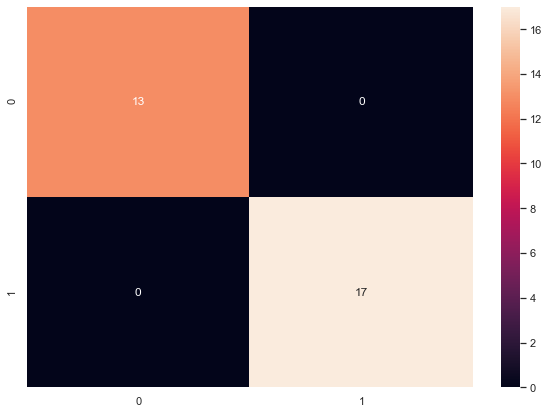

In [109]:
from sklearn.naive_bayes import MultinomialNB
class Naive_Bayes(Model):
    def train(self, x_train, y_train,**kwargs):
        self.mnb = MultinomialNB()
        self.mnb.fit(x_train, y_train)
        return self.mnb
    def predict(self,x_validation):
        return self.mnb.predict(x_validation)
Naive_Bayes().pipeline(x_train, y_train, x_validation.values, y_validation,"Naive Bayes 2 Authors 1.4",do_cross_validation=False)

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        13
           1       0.89      1.00      0.94        17

    accuracy                           0.93        30
   macro avg       0.95      0.92      0.93        30
weighted avg       0.94      0.93      0.93        30



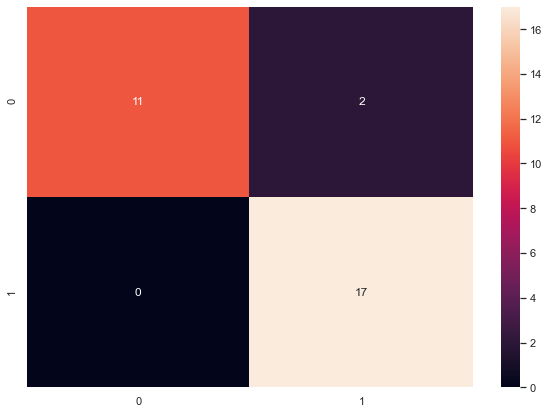

In [111]:
from sklearn.linear_model import SGDClassifier
class LogisticRegression(Model):
    def train(self, x_train, y_train,**kwargs):
        self.mnb = SGDClassifier(loss='log')
        self.mnb.fit(x_train, y_train)
        return self.mnb
    def predict(self,x_validation):
        return self.mnb.predict(x_validation)
KNN().pipeline(x_train, y_train, x_validation.values, y_validation,"LogisticRegression 2 Authors 1.1",do_cross_validation=False)

              precision    recall  f1-score   support

           0       0.31      0.29      0.30        14
           1       0.41      0.44      0.42        16

    accuracy                           0.37        30
   macro avg       0.36      0.36      0.36        30
weighted avg       0.36      0.37      0.36        30



C:\Users\eviat\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


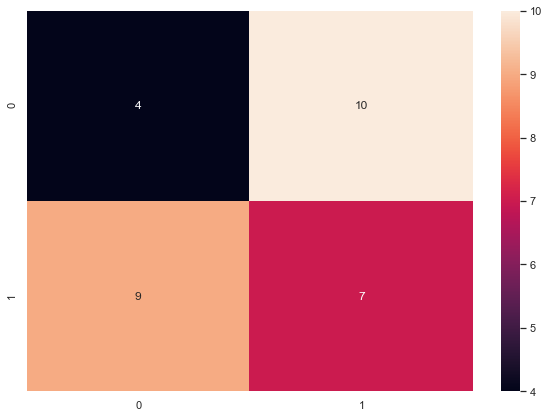

In [15]:
from sklearn.neighbors import KNeighborsClassifier
class KNN(Model):
    def train(self, x_train, y_train,**kwargs):
        self.mnb = KNeighborsClassifier(n_neighbors=7, weights= 'distance', p=2)
        self.mnb.fit(x_train, y_train)
        return self.mnb
    def predict(self,x_test):
        return self.mnb.predict(x_test)
KNN().pipeline(x_train.values, y_train.values, x_test.values, y_test.values,"KNN 2 Authors 1.3",do_cross_validation=False)

C:\Users\eviat\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0       0.31      0.29      0.30        14
           1       0.41      0.44      0.42        16

    accuracy                           0.37        30
   macro avg       0.36      0.36      0.36        30
weighted avg       0.36      0.37      0.36        30



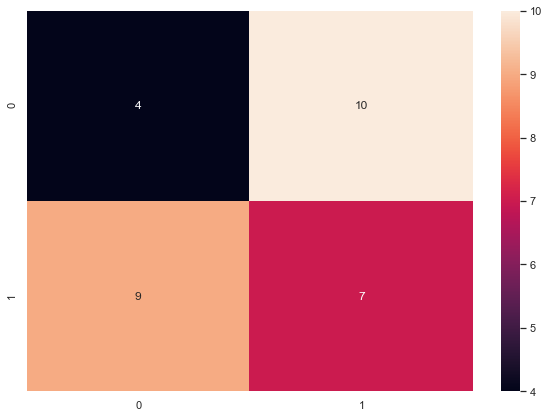

In [16]:
from sklearn.linear_model import SGDClassifier
class LogisticRegression(Model):
    def train(self, x_train, y_train,**kwargs):
        self.mnb = SGDClassifier(loss='log')
        self.mnb.fit(x_train, y_train)
        return self.mnb
    def predict(self,x_test):
        return self.mnb.predict(x_test)
KNN().pipeline(x_train.values, y_train.values, x_test.values, y_test.values,"LogisticRegression 2 Authors 1.1",do_cross_validation=False)

In [169]:
x_test = x_test.drop([feature for feature in col if feature not in sel.get_feature_names_out()],axis=1)
# x_test
x_train

array([[2, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 4, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=int64)

In [170]:
x_train.shape

(70, 679)

In [171]:
x_test.shape

(100, 679)

In [184]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
mnb = SGDClassifier(loss='log')
mnb.fit(x_train, y_train)
pred = mnb.predict(x_test.values)
ss = classification_report(pred, y_test,output_dict=True)
print(ss)

{'0': {'precision': 0.98, 'recall': 0.98, 'f1-score': 0.98, 'support': 50}, '1': {'precision': 0.98, 'recall': 0.98, 'f1-score': 0.98, 'support': 50}, 'accuracy': 0.98, 'macro avg': {'precision': 0.98, 'recall': 0.98, 'f1-score': 0.98, 'support': 100}, 'weighted avg': {'precision': 0.98, 'recall': 0.98, 'f1-score': 0.98, 'support': 100}}


0.98

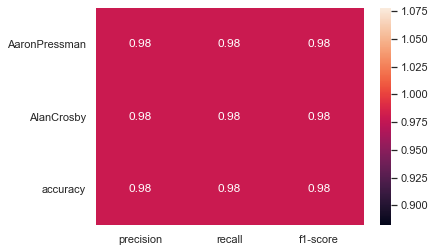

In [199]:
import seaborn as sns 
clf_report = classification_report(y_test, pred,target_names= ["AaronPressman","AlanCrosby"],output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :-2].T, annot=True)
clf_report['accuracy']